In [31]:
from math import sqrt
from scipy import stats
from pydataset import data
from datetime import datetime


from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import sklearn.metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from env import host, user, password
from acquire import get_telco_data, get_telco_df, summarize_df, df_value_counts
from prepare import prep_telco, split_data, convert_cats, graph_distributions
from evaluation import evaluate

## Data Acquistion
 -Will be using functions from our acquire.py to build our pandas dataframes from SQL and form local CSV files

In [2]:
telco_df = get_telco_df()  ##displaying head of the dataframe just built using our get_telco_df
                           ## function which connects to SQL and reads the table into a 
                           ## pandas dataframe and creates a local CSV file.

In [3]:
telco_df.head() ##display dataframe 

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,3,0016-QLJIS,Female,0,Yes,Yes,65,Yes,...,Yes,Yes,Yes,Yes,90.45,5957.9,No,Two year,DSL,Mailed check
1,4,1,3,0017-DINOC,Male,0,No,No,54,No,...,Yes,Yes,No,No,45.20,2460.55,No,Two year,DSL,Credit card (automatic)
2,3,1,3,0019-GFNTW,Female,0,No,No,56,No,...,Yes,No,No,No,45.05,2560.1,No,Two year,DSL,Bank transfer (automatic)
3,4,1,3,0056-EPFBG,Male,0,Yes,Yes,20,No,...,Yes,No,No,Yes,39.40,825.4,No,Two year,DSL,Credit card (automatic)
4,3,1,3,0078-XZMHT,Male,0,Yes,No,72,Yes,...,Yes,Yes,Yes,Yes,85.15,6316.2,No,Two year,DSL,Bank transfer (automatic)


#### Summarize Dataframes columns

In [4]:
summarize_df(telco_df) ##display summary of dataframe

This dataframe has 7043 rows and 24 columns.
-------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             704

In [5]:
telco_df.describe().T ##displaying a transposed summary of numeric variable statistics

,count,mean,std,min,25%,50%,75%,max
payment_type_id,7043.0,2.315633,1.148907,1.00,1.0,2.00,3.00,4.00
internet_service_type_id,7043.0,1.872923,0.737796,1.00,1.0,2.00,2.00,3.00
contract_type_id,7043.0,1.690473,0.833755,1.00,1.0,1.00,2.00,3.00
senior_citizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
monthly_charges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


#### Categorical Variable Value Counts

In [6]:
df_value_counts(telco_df) ##displaying value counts of all the categorical variables I want to look at

Male      3555
Female    3488
Name: gender, dtype: int64
-----------------
0    5901
1    1142
Name: senior_citizen, dtype: int64
-----------------
No     3641
Yes    3402
Name: partner, dtype: int64
-----------------
No     4933
Yes    2110
Name: dependents, dtype: int64
-----------------
Yes    6361
No      682
Name: phone_service, dtype: int64
-----------------
No                  3390
Yes                 2971
No phone service     682
Name: multiple_lines, dtype: int64
-----------------
Yes    4171
No     2872
Name: paperless_billing, dtype: int64
-----------------
No     5174
Yes    1869
Name: churn, dtype: int64
-----------------
Month-to-month    3875
Two year          1695
One year          1473
Name: contract_type, dtype: int64
-----------------
Fiber optic    3096
DSL            2421
None           1526
Name: internet_service_type, dtype: int64
-----------------
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (a

## Data Preparation

In [7]:
telco_df = prep_telco(telco_df)

In [9]:
telco_df.isnull().sum()

payment_type_id             0
internet_service_type_id    0
contract_type_id            0
customer_id                 0
gender                      0
senior_citizen              0
partner                     0
dependents                  0
tenure                      0
phone_service               0
multiple_lines              0
online_security             0
online_backup               0
device_protection           0
tech_support                0
streaming_tv                0
streaming_movies            0
paperless_billing           0
monthly_charges             0
total_charges               0
churn                       0
contract_type               0
internet_service_type       0
payment_type                0
dtype: int64

#### Graph Distributions of Categorical Variables

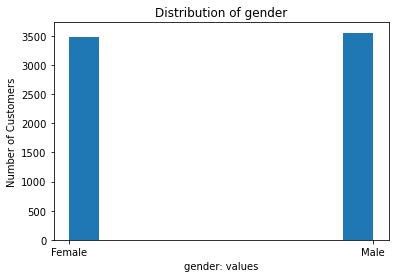

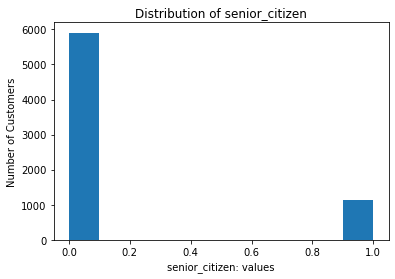

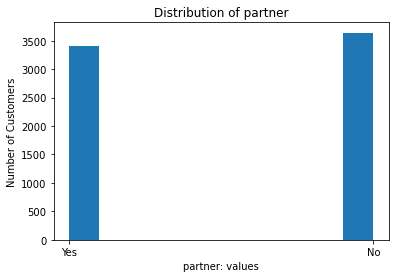

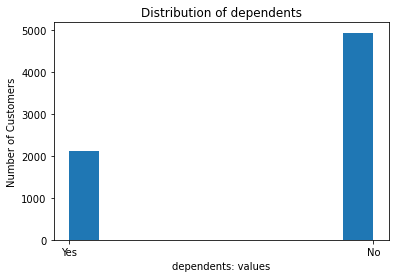

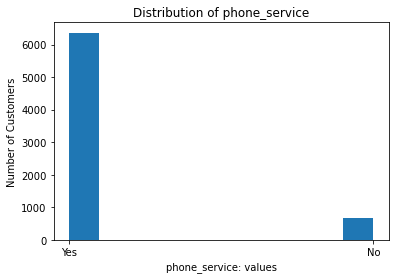

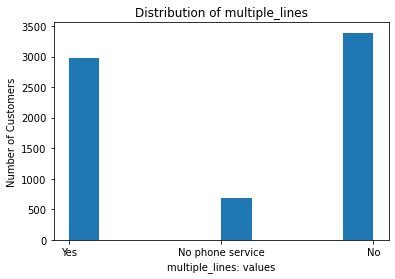

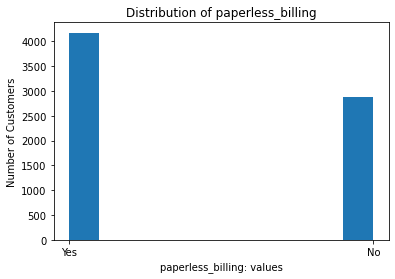

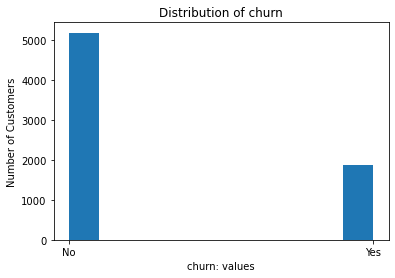

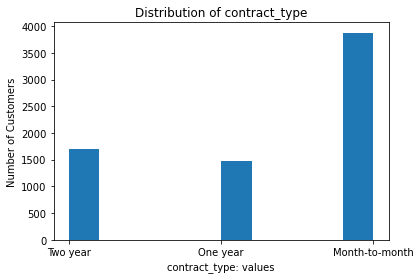

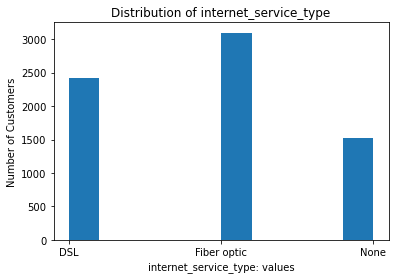

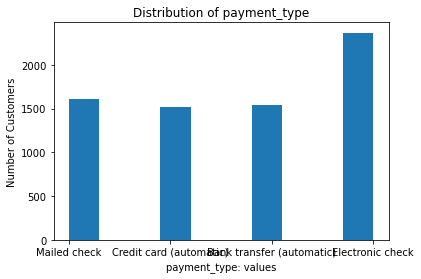

In [8]:
graph_distributions(telco_df) ## function inside prepare.py used to display histograms of 
## categorical values (viewing their distributions)

## Explore & Hypothesis

#### Feature Engineering

In [10]:
telco_df['fiber'] = np.where(telco_df.internet_service_type_id == 2, 1, 0)
telco_df['month_to_month'] = np.where(telco_df.contract_type_id == 1, 1, 0)

## Making a month-to-month column and a fiber internet column remembering those columns were important
## in the storytelling project for looking at churn

In [11]:
telco_df.head() ##displaying new dataframe

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,fiber,month_to_month
0,2,1,3,0016-QLJIS,Female,0,Yes,Yes,65,Yes,...,Yes,Yes,90.45,5957.90,No,Two year,DSL,Mailed check,0,0
1,4,1,3,0017-DINOC,Male,0,No,No,54,No,...,No,No,45.20,2460.55,No,Two year,DSL,Credit card (automatic),0,0
2,3,1,3,0019-GFNTW,Female,0,No,No,56,No,...,No,No,45.05,2560.10,No,Two year,DSL,Bank transfer (automatic),0,0
3,4,1,3,0056-EPFBG,Male,0,Yes,Yes,20,No,...,No,Yes,39.40,825.40,No,Two year,DSL,Credit card (automatic),0,0
4,3,1,3,0078-XZMHT,Male,0,Yes,No,72,Yes,...,Yes,Yes,85.15,6316.20,No,Two year,DSL,Bank transfer (automatic),0,0


In [12]:
cols2 = ['senior_citizen',
        'multiple_lines',
        'paperless_billing', 'contract_type', 'fiber', 'month_to_month']

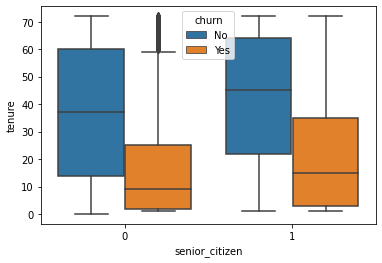

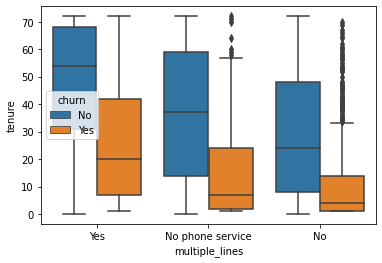

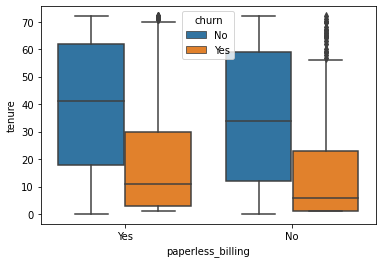

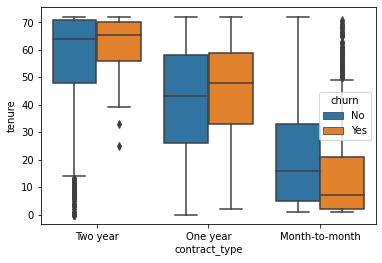

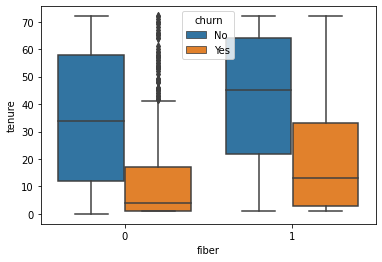

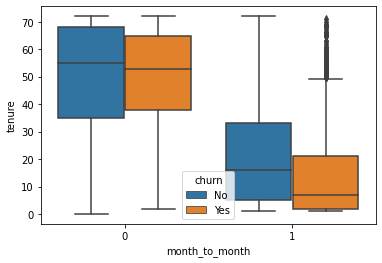

In [13]:
for col in cols2:  ### looking at box plots of tenure vs all the columns with churn
                ### as a hue to determine what questions I would like to ask for my 
        ### statistical analysis
    sns.boxplot(data = telco_df, x= col, y='tenure', hue = 'churn') 
    plt.show()

In [14]:
telco_num = convert_cats(telco_df) ##converting dataframe to numerical dataframe for computer format
telco_num.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,fiber,month_to_month
0,2,1,3,9,0,0,1,1,65,1,...,2,1,90.45,5957.90,0,2,0,3,0,0
1,4,1,3,10,1,0,0,0,54,0,...,0,0,45.20,2460.55,0,2,0,1,0,0
2,3,1,3,14,0,0,0,0,56,0,...,0,0,45.05,2560.10,0,2,0,0,0,0
3,4,1,3,34,1,0,1,1,20,0,...,0,1,39.40,825.40,0,2,0,1,0,0
4,3,1,3,45,1,0,1,0,72,1,...,2,1,85.15,6316.20,0,2,0,0,0,0


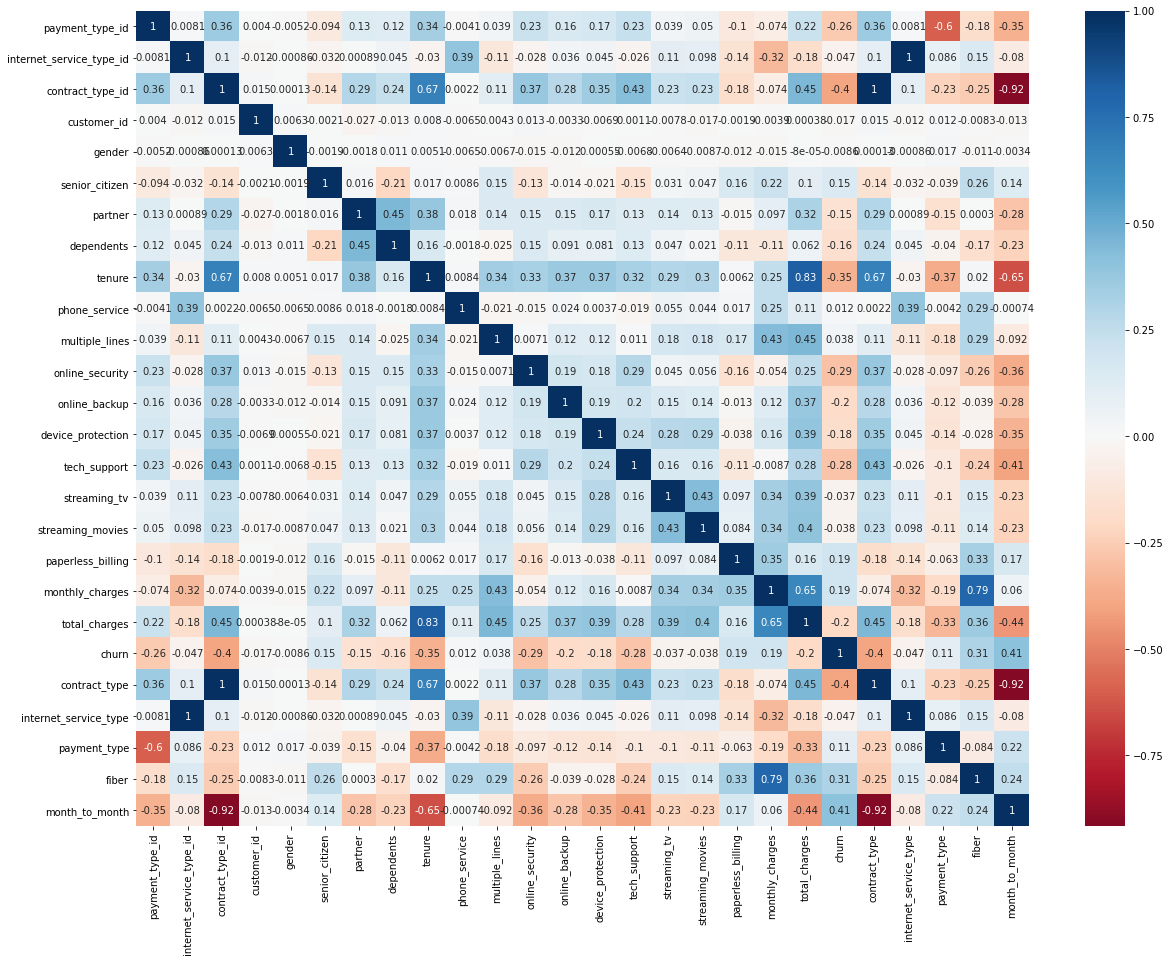

In [15]:
plt.figure(figsize = (20,15))  ##making a heap map to look at correlations with churn for the train data set
sns.heatmap(telco_df.corr(), cmap ='RdBu', center = 0, annot = True)
plt.show()                    ## helping me choose which features to use in my model

### Question 1: Is there a relationship between customers with paperless billing and whether or not they churned

In [16]:
alpha = 0.5

##### $H_0$: There is no relationship between paperless billing and whether or not a customer has churned

##### $H_a$: There is a relationship between paperless billing customers and whether or not they have churned

In [17]:
telco_num = convert_cats(telco_df) ##converting dataframe to numerical dataframe for computer format
telco_num.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,fiber,month_to_month
0,2,1,3,9,0,0,1,1,65,1,...,2,1,90.45,5957.90,0,2,0,3,0,0
1,4,1,3,10,1,0,0,0,54,0,...,0,0,45.20,2460.55,0,2,0,1,0,0
2,3,1,3,14,0,0,0,0,56,0,...,0,0,45.05,2560.10,0,2,0,0,0,0
3,4,1,3,34,1,0,1,1,20,0,...,0,1,39.40,825.40,0,2,0,1,0,0
4,3,1,3,45,1,0,1,0,72,1,...,2,1,85.15,6316.20,0,2,0,0,0,0


In [18]:
observed = pd.crosstab(telco_num.paperless_billing, telco_num.churn)

## ^making a crosstab of the observed values for the chi^2 test. (paperless_billing and churn)
chi2, p, degf, expected = stats.chi2_contingency(observed)

## ^ performing the test on observed and outputting results
print('Observed\n')
print(observed)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

churn                 0     1
paperless_billing            
0                  2403   469
1                  2771  1400
---
Expected

[[2109.85773108  762.14226892]
 [3064.14226892 1106.85773108]]
---

chi^2 = 258.2776
p     = 0.0000


##### Given our p value is less than our alpha (0.5) and is nearly approaching 0 we can reject our null hypothesis and same there is a significant relationship between paperless billing and whether or not a customer has churned

### Question 2: Is there a relationship between if a customer has multiple lines and whether or not they have churned

In [19]:
alpha = 0.5

##### $H_0$: There is no relationship between customers having multiple lines and whether or not they have churned

##### $H_a$: There is a relationship between customers having multiple lines and whether or not they have churned


In [20]:
observed = pd.crosstab(telco_num.multiple_lines, telco_num.churn)

## ^making a crosstab of the observed values for the chi^2 test. (paperless_billing and churn)
chi2, p, degf, expected = stats.chi2_contingency(observed)

## ^ performing the test on observed and outputting results
print('Observed\n')
print(observed)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

churn              0    1
multiple_lines           
0               2541  849
1                512  170
2               2121  850
---
Expected

[[2490.39613801  899.60386199]
 [ 501.01774812  180.98225188]
 [2182.58611387  788.41388613]]
---

chi^2 = 11.3304
p     = 0.0035


##### Given our p value is less than our alpha (0.5) and is 0.0035 we can reject our null hypothesis and same there is a significant relationship between the multiple line customer data and whether or not they have churned

## Data Split Part II

In [21]:
train, validate, test = split_data(telco_num)

In [22]:
train.shape, validate.shape, test.shape

((3943, 26), (1691, 26), (1409, 26))

In [23]:
train.head() ## displaying train dataset

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,fiber,month_to_month
5642,4,3,3,1332,0,0,1,1,23,1,...,1,1,25.60,514.75,0,2,2,1,0,0
3338,3,2,2,6343,1,0,0,0,27,1,...,2,1,100.50,2673.45,0,1,1,0,1,0
4273,1,2,1,2887,0,1,0,0,7,1,...,2,1,89.15,574.35,0,0,1,2,1,1
2382,3,1,1,6787,0,0,1,0,47,1,...,0,1,58.60,2723.40,0,0,0,0,0,1
2655,4,2,3,4037,1,0,0,0,41,1,...,2,1,99.65,4220.35,0,2,1,1,1,0


In [24]:
validate.head() ## displaying validate dataset

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,fiber,month_to_month
1630,2,1,1,2564,1,0,0,0,2,1,...,0,1,53.85,108.15,1,0,0,3,0,1
5181,1,2,1,5943,1,0,0,1,1,1,...,0,1,71.65,71.65,1,0,1,2,1,1
4239,3,2,1,2779,0,1,0,0,23,1,...,0,1,75.40,1643.55,0,0,1,0,1,1
5814,2,3,3,3252,1,0,1,1,45,1,...,1,0,24.45,1088.25,0,2,2,3,0,0
1438,3,1,1,1425,0,0,1,0,5,1,...,0,0,67.95,350.30,1,0,0,0,0,1


In [25]:
test.head() ## displaying test dataset

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,fiber,month_to_month
2789,3,2,3,6121,1,0,0,0,72,1,...,2,0,113.40,8164.10,0,2,1,0,1,0
1233,3,1,1,229,1,0,1,0,11,1,...,0,1,45.90,521.90,0,0,0,0,0,1
6784,2,3,1,3357,1,0,0,0,1,1,...,1,0,20.20,20.20,1,0,2,3,0,1
3177,1,2,2,4210,1,0,1,0,71,1,...,2,1,109.60,7854.15,0,1,1,2,1,0
1740,2,1,1,3093,1,0,0,0,2,1,...,0,0,44.65,74.90,1,0,0,3,0,1


## Model Building & Evaluation

#### Determining Baseline Accuracy

In [26]:
train.churn.value_counts() ## doing value counts to look at what should be our baseline

0    2897
1    1046
Name: churn, dtype: int64

In [27]:
train['baseline'] = 0  ## adding a baseline column to train data set. Set to 0 because that
train.head()           ## is the most frequent value

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,fiber,month_to_month,baseline
5642,4,3,3,1332,0,0,1,1,23,1,...,1,25.60,514.75,0,2,2,1,0,0,0
3338,3,2,2,6343,1,0,0,0,27,1,...,1,100.50,2673.45,0,1,1,0,1,0,0
4273,1,2,1,2887,0,1,0,0,7,1,...,1,89.15,574.35,0,0,1,2,1,1,0
2382,3,1,1,6787,0,0,1,0,47,1,...,1,58.60,2723.40,0,0,0,0,0,1,0
2655,4,2,3,4037,1,0,0,0,41,1,...,1,99.65,4220.35,0,2,1,1,1,0,0


In [28]:
## calculating a baseline accuracy
base_acc = (train.baseline == train.churn).mean()
print(f'The baseline accuracy is: {base_acc:.4f}')

The baseline accuracy is: 0.7347


In [33]:
##set up X and Ys
cols = ['tenure', 'monthly_charges', 'fiber', 'month_to_month']


X_train, y_train = train[cols], train.churn
X_validate, y_validate = validate[cols], validate.churn
X_test, y_test = test[cols], test.churn

# Performing Train Tests

### Decision Tree Classifier Train test

In [61]:
model = DecisionTreeClassifier(random_state = 123, max_depth = 10)
model.fit(X_train, y_train)

print(f'The baseline accuracy is: {base_acc:.4%}')
evaluate(X_train, y_train, model)

The baseline accuracy is: 73.4720%

    The accuracy for our model is 85.1129%

    The True Positive Rate is 67.878%,    The False Positive Rate is 8.664%,
    The True Negative Rate is 91.336%,    The False Negative Rate is 32.122%

    ________________________________________________________________________________
    

    The positive is  'churned'

    Confusion Matrix
    


,pred_not_churned,pred_churned
actual_not_churned,True Negative: 2646,False positive: 251
actual_churned,False Negative: 336,True Positive: 710




    ________________________________________________________________________________
    
    Classification Report:
    


,precision,recall,f1-score,support
not churned,0.887324,0.913359,0.900153,2897.000000
churned,0.738814,0.678776,0.707524,1046.000000
accuracy,0.851129,0.851129,0.851129,0.851129
macro avg,0.813069,0.796067,0.803838,3943.000000
weighted avg,0.847927,0.851129,0.849052,3943.000000


#### Decision Tree Takeaways:
    - Given the idea that we want to predict the customers that will churn because we want to try to prevent as many churns as possible. This is a good model for us because the True Positive prediction is 68% meaning we have a good prediction of customers that will churn and have a good chance to save some of their business.

### Random Forest Model Train Test

In [60]:
forest_model = RandomForestClassifier()
forest_model.fit(X_train, y_train)

print(f'The baseline accuracy is: {base_acc:.4%}')
evaluate(X_train, y_train, forest_model)

The baseline accuracy is: 73.4720%

    The accuracy for our model is 98.8334%

    The True Positive Rate is 97.323%,    The False Positive Rate is 0.621%,
    The True Negative Rate is 99.379%,    The False Negative Rate is 2.677%

    ________________________________________________________________________________
    

    The positive is  'churned'

    Confusion Matrix
    


,pred_not_churned,pred_churned
actual_not_churned,True Negative: 2879,False positive: 18
actual_churned,False Negative: 28,True Positive: 1018




    ________________________________________________________________________________
    
    Classification Report:
    


,precision,recall,f1-score,support
not churned,0.990368,0.993787,0.992074,2897.000000
churned,0.982625,0.973231,0.977906,1046.000000
accuracy,0.988334,0.988334,0.988334,0.988334
macro avg,0.986497,0.983509,0.984990,3943.000000
weighted avg,0.988314,0.988334,0.988316,3943.000000


#### Random Forest Takeaways:
    - 

### KNN Model Train Test

In [59]:
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(X_train, y_train)

print(f'The baseline accuracy is: {base_acc:.4%}')
evaluate(X_train, y_train, knn_model)

The baseline accuracy is: 73.4720%

    The accuracy for our model is 83.8194%

    The True Positive Rate is 59.847%,    The False Positive Rate is 7.525%,
    The True Negative Rate is 92.475%,    The False Negative Rate is 40.153%

    ________________________________________________________________________________
    

    The positive is  'churned'

    Confusion Matrix
    


,pred_not_churned,pred_churned
actual_not_churned,True Negative: 2679,False positive: 218
actual_churned,False Negative: 420,True Positive: 626




    ________________________________________________________________________________
    
    Classification Report:
    


,precision,recall,f1-score,support
not churned,0.864472,0.924750,0.893596,2897.000000
churned,0.741706,0.598470,0.662434,1046.000000
accuracy,0.838194,0.838194,0.838194,0.838194
macro avg,0.803089,0.761610,0.778015,3943.000000
weighted avg,0.831905,0.838194,0.832273,3943.000000


### Logistic Regression Model Train Test

In [58]:
logic_model = LogisticRegression(random_state = 123)
logic_model.fit(X_train, y_train)

print(f'The baseline accuracy is: {base_acc:.4%}')
evaluate(X_train, y_train, logic_model)

The baseline accuracy is: 73.4720%

    The accuracy for our model is 78.4174%

    The True Positive Rate is 48.184%,    The False Positive Rate is 10.666%,
    The True Negative Rate is 89.334%,    The False Negative Rate is 51.816%

    ________________________________________________________________________________
    

    The positive is  'churned'

    Confusion Matrix
    


,pred_not_churned,pred_churned
actual_not_churned,True Negative: 2588,False positive: 309
actual_churned,False Negative: 542,True Positive: 504




    ________________________________________________________________________________
    
    Classification Report:
    


,precision,recall,f1-score,support
not churned,0.826837,0.893338,0.858802,2897.000000
churned,0.619926,0.481836,0.542227,1046.000000
accuracy,0.784174,0.784174,0.784174,0.784174
macro avg,0.723382,0.687587,0.700515,3943.000000
weighted avg,0.771948,0.784174,0.774821,3943.000000


### Random Forest Model 2 Train Test

In [57]:
forest_model2 = RandomForestClassifier(max_leaf_nodes = 23)
forest_model2.fit(X_train, y_train)

print(f'The baseline accuracy is: {base_acc:.4%}')
evaluate(X_train, y_train, forest_model2)

The baseline accuracy is: 73.4720%

    The accuracy for our model is 80.5478%

    The True Positive Rate is 44.646%,    The False Positive Rate is 6.489%,
    The True Negative Rate is 93.511%,    The False Negative Rate is 55.354%

    ________________________________________________________________________________
    

    The positive is  'churned'

    Confusion Matrix
    


,pred_not_churned,pred_churned
actual_not_churned,True Negative: 2709,False positive: 188
actual_churned,False Negative: 579,True Positive: 467




    ________________________________________________________________________________
    
    Classification Report:
    


,precision,recall,f1-score,support
not churned,0.823905,0.935105,0.875990,2897.000000
churned,0.712977,0.446463,0.549089,1046.000000
accuracy,0.805478,0.805478,0.805478,0.805478
macro avg,0.768441,0.690784,0.712540,3943.000000
weighted avg,0.794478,0.805478,0.789270,3943.000000
